Aproximación del método del trapecio: 573.0431666145687
Aproximación del método de Simpson: 572.566425409628


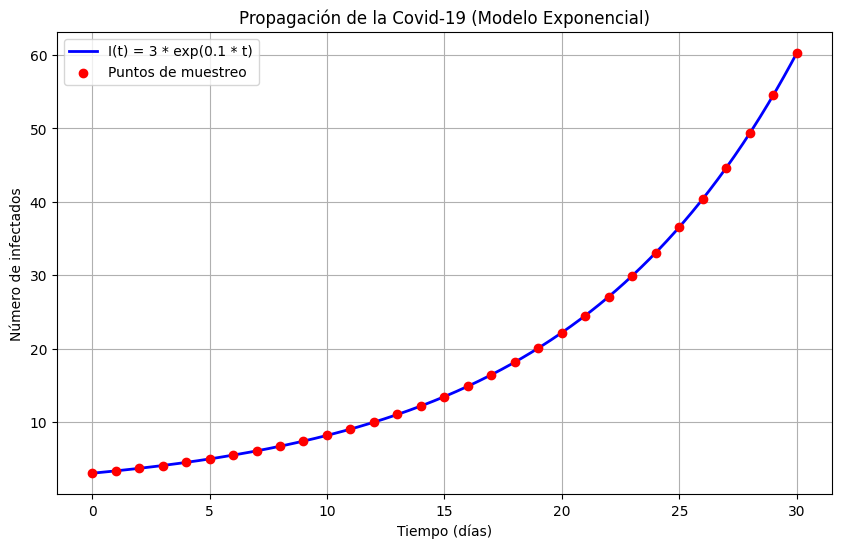

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
I0 = 3  # número inicial de infectados
r = 0.1  # tasa de crecimiento
h = 1  # paso de tiempo
t_max = 30  # tiempo máximo

# Función que modela la propagación
def I(t):
    return I0 * np.exp(r * t)

# Método del trapecio
def trapecio(f, t_values, h):
    result = f(t_values[0]) + f(t_values[-1])
    for i in range(1, len(t_values) - 1):
        result += 2 * f(t_values[i])
    return result * (h / 2)

# Método de Simpson
def simpson(f, t_values, h):
    result = f(t_values[0]) + f(t_values[-1])
    for i in range(1, len(t_values) - 1, 2):
        result += 4 * f(t_values[i])
    for i in range(2, len(t_values) - 1, 2):
        result += 2 * f(t_values[i])
    return result * (h / 3)

# Valores de t (días)
t_values = np.arange(0, t_max + 1, h)

# Cálculo de las aproximaciones
trapecio_result = trapecio(I, t_values, h)
simpson_result = simpson(I, t_values, h)

# Mostrar resultados
print(f"Aproximación del método del trapecio: {trapecio_result}")
print(f"Aproximación del método de Simpson: {simpson_result}")

# Graficar la función I(t) y las aproximaciones
t_continuous = np.linspace(0, t_max, 500)  # para graficar una curva suave
I_continuous = I(t_continuous)

plt.figure(figsize=(10, 6))
plt.plot(t_continuous, I_continuous, label='I(t) = 3 * exp(0.1 * t)', color='blue', linestyle='-', linewidth=2)
plt.scatter(t_values, I(t_values), color='red', label='Puntos de muestreo', zorder=5)
plt.title("Propagación de la Covid-19 (Modelo Exponencial)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Número de infectados")
plt.legend()
plt.grid(True)
plt.show()
